In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [129]:
fish = pd.read_excel('어업별_품종별_통계.xlsx')
wt_2014 = pd.read_csv('water_temp_2014.csv', encoding='euc_kr')
wt_2015 = pd.read_csv('water_temp_2015.csv', encoding='euc_kr')
wt_2016 = pd.read_csv('water_temp_2016.csv', encoding='euc_kr')
wt_2017 = pd.read_csv('water_temp_2017.csv', encoding='euc_kr')
wt_2018 = pd.read_csv('water_temp_2018.csv', encoding='euc_kr')
wt_2019 = pd.read_csv('water_temp_2019.csv', encoding='euc_kr')
wt_2020 = pd.read_csv('water_temp_2020.csv', encoding='euc_kr')
wt_2021 = pd.read_csv('water_temp_2021.csv', encoding='euc_kr')
wt_2022 = pd.read_csv('water_temp_2022.csv', encoding='euc_kr')
wt_2023 = pd.read_csv('water_temp_2023.csv', encoding='euc_kr')

In [130]:
fish

,시점,고등어,고등어.1,망치고등어,망치고등어.1,꽁치,꽁치.1,학공치,학공치.1,도루묵,...,고등어.2,고등어.3,고등어류,고등어류.1,꽁치.2,꽁치.3,갑오징어류.2,갑오징어류.3,오징어류,오징어류.1
0,시점,생산량:계,생산금액:계,생산량:계,생산금액:계,생산량:계,생산금액:계,생산량:계,생산금액:계,생산량:계,...,생산량:계,생산금액:계,생산량:계,생산금액:계,생산량:계,생산금액:계,생산량:계,생산금액:계,생산량:계,생산금액:계
1,2014.01,6479,10823407,133,435185,23,50700,252,300021,167,...,11,155780,189,181062,0,0,16,32808,8160,17121213
2,2014.02,3783,7650194,171,302557,16,47465,25,34267,160,...,9,150110,97,93217,0,0,6,9612,11462,22971366
3,2014.03,3057,6809538,33,198320,39,103689,1,3230,566,...,5,90000,81,77922,0,0,1,1604,24562,35245156
4,2014.04,1649,3191578,71,304610,87,316667,17,72054,680,...,12,194000,30,28230,0,0,3,4704,39961,49066852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2023.08,8203,11771012,8162,7926444,0,0,114,151067,114,...,22,384450,0,0,268,1292913,0,0,246,1179152
117,2023.09,13331,24252709,6196,6182394,0,79,3,19185,20,...,23,432000,0,0,854,4116351,0,0,38,138262
118,2023.1,12649,22404568,5826,7516067,7,35817,14,86618,20,...,18,307000,0,0,224,1080263,0,0,1,1074
119,2023.11,15703,25040243,12973,14561509,6,27697,12,108046,168,...,17,337000,0,0,49,235991,0,0,1,1652


In [132]:
temp_list = [wt_2014, wt_2015, wt_2016, wt_2017, wt_2018,
             wt_2019, wt_2020, wt_2021, wt_2022, wt_2023]

def make_month_temp(data):
    list_data = []
    for i in range(len(data)):
        list_data.append(data['일시'][i][:7])
    data['일시'] = list_data
    data

    month_temp = []
    for i in sorted(data['일시'].value_counts().index):
        if data.columns[8] == '수온(°C)':
            month_temp.append(data[data['일시'] == i]['수온(°C)'].mean())
        else:
            month_temp.append(data[data['일시'] == i]['평균 수온(°C)'].mean())
    return month_temp

In [133]:
def make_df(fish, *columns):
    total_temp = []
    for i in temp_list:
        total_temp += make_month_temp(i)
    fish_product = fish.loc[1:,columns]

    fish_data = []
    for i in range(1, len(fish_product)+1):
        fish_data.append(fish_product.loc[i].sum())

    year = []
    for i in range(1, len(fish['시점'])):
        year.append(int(fish['시점'][i]))

    year_month = []
    for i in list(fish['시점'][1:]):
        year_month.append(str(i) + '월')

    df = pd.DataFrame({'시점' : list(fish['시점'][1:]), 
                       '어획량' : fish_data,
                       '수온' : total_temp,
                       '년도' : year,
                       '년월' : year_month})
    return df

In [134]:
mackerel = make_df(fish, '고등어', '망치고등어', '고등어.2', '고등어류')
mackerel

,시점,어획량,수온,년도,년월
0,2014.01,6812,12.914825,2014,2014.01월
1,2014.02,4060,11.535285,2014,2014.02월
2,2014.03,3176,10.651902,2014,2014.03월
3,2014.04,1762,13.357103,2014,2014.04월
4,2014.05,751,15.639946,2014,2014.05월
...,...,...,...,...,...
115,2023.08,16387,27.354839,2023,2023.08월
116,2023.09,19550,25.313793,2023,2023.09월
117,2023.10,18493,21.706452,2023,2023.1월
118,2023.11,28693,19.380000,2023,2023.11월


## 연도별 수온 변화 분석

In [135]:
def m_year(year):
    m_2014 = mackerel[mackerel['년도'] == year]
    return m_2014

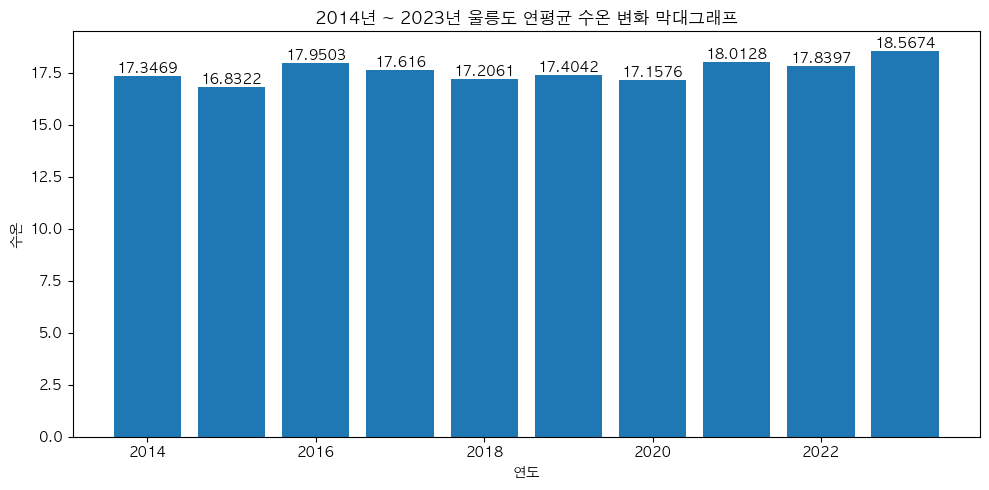

2014년 울릉도 평균 수온: 17.35도
2015년 울릉도 평균 수온: 16.83도
2016년 울릉도 평균 수온: 17.95도
2017년 울릉도 평균 수온: 17.62도
2018년 울릉도 평균 수온: 17.21도
2019년 울릉도 평균 수온: 17.4도
2020년 울릉도 평균 수온: 17.16도
2021년 울릉도 평균 수온: 18.01도
2022년 울릉도 평균 수온: 17.84도
2023년 울릉도 평균 수온: 18.57도


In [158]:
month_temp = []
for i in range(2014, 2024):
    month_temp.append(m_year(i)['수온'].mean())

plt.figure(figsize = (10, 5))
a = plt.bar(range(2014, 2024), month_temp)
plt.title('2014년 ~ 2023년 울릉도 연평균 수온 변화 막대그래프')
plt.xlabel('연도')
plt.ylabel('수온')
plt.bar_label(a, label_type='edge')
plt.tight_layout()
plt.show()

for i in range(10):
    print(f'{2014 + i}년 울릉도 평균 수온: {round(month_temp[i], 2)}도')

> 2014년에 비해 1도 이상 수온이 상승하였다. 바다 수온이 1도 상승했다는 말은 핵폭탄 2800만개의 에너지가 필요하다는 의미이며 지구 환경에 큰 부담이 된다.

https://www.khan.co.kr/article/201008242147555

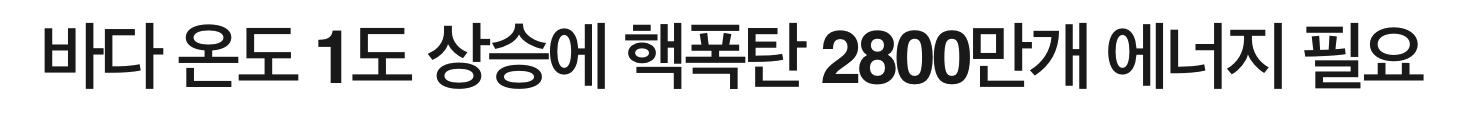

## 수온과 고등어 어획량의 상관분석

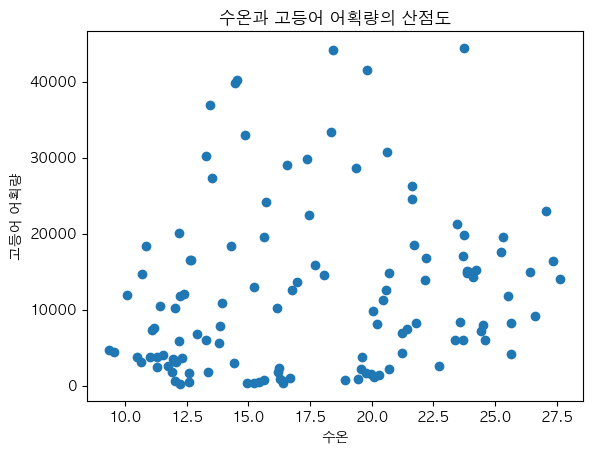

In [159]:
plt.scatter(mackerel['수온'], mackerel['어획량'])
plt.title('수온과 고등어 어획량의 산점도')
plt.xlabel('수온')
plt.ylabel('고등어 어획량')
plt.show()

In [138]:
mackerel.corr(numeric_only=True)

,시점,어획량,수온,년도
시점,1.000000,0.027334,0.066327,0.999928
어획량,0.027334,1.000000,0.180841,0.020733
수온,0.066327,0.180841,1.000000,0.059358
년도,0.999928,0.020733,0.059358,1.000000


> 수온이 증가함에 따라 난류성 어종인 고등어의 어획량이 증가할 것으로 생각했지만 큰 상관관계는 발견하지 못하였다.

## 연도별 고등어 어획량 분석

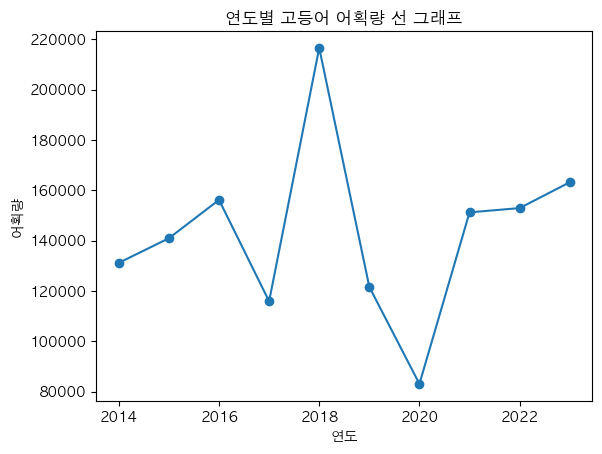

In [151]:
year_catch = []
for i in range(2014, 2024):
    year_catch.append(mackerel[mackerel['년도'] == i]['어획량'].sum())

plt.title('연도별 고등어 어획량 선 그래프')
plt.xlabel('연도')
plt.ylabel('어획량')
plt.plot(range(2014, 2024), year_catch, marker = 'o')
plt.show()

> 실제로 연도별 고등어 어획량에 대한 막대그래프를 그려봐도 고등어 어획량이 증가하는 경향은 보이지 않았다.  
> 아마 어획량은 수온 뿐만 아니라 다양한 요인이 영향을 미치는 것으로 추측했다.

> 하지만 그래프에서 특이한 점을 발견하였는데 2018년에 고등어 어획량이 엄청 높고 2020년에는 엄청 낮은 것을 확인 가능했으며 왜 그런지 이유를 찾아보기로 하였다.

https://www.busan.com/view/busan/view.php?code=20181204000272

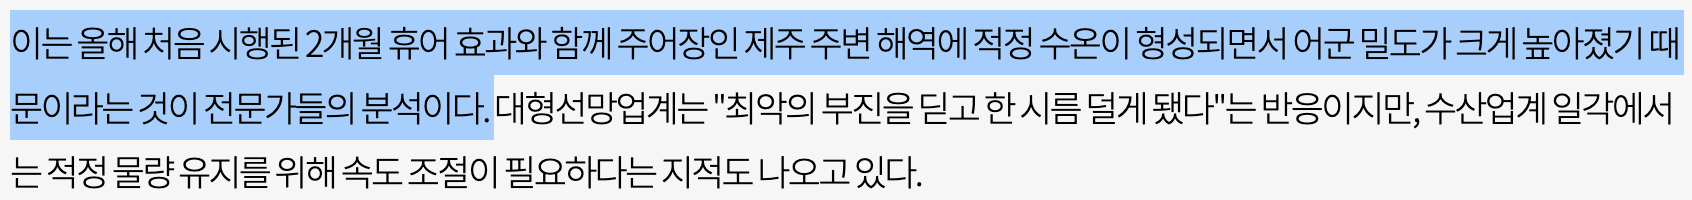

https://www.news1.kr/economy/trend/3554533

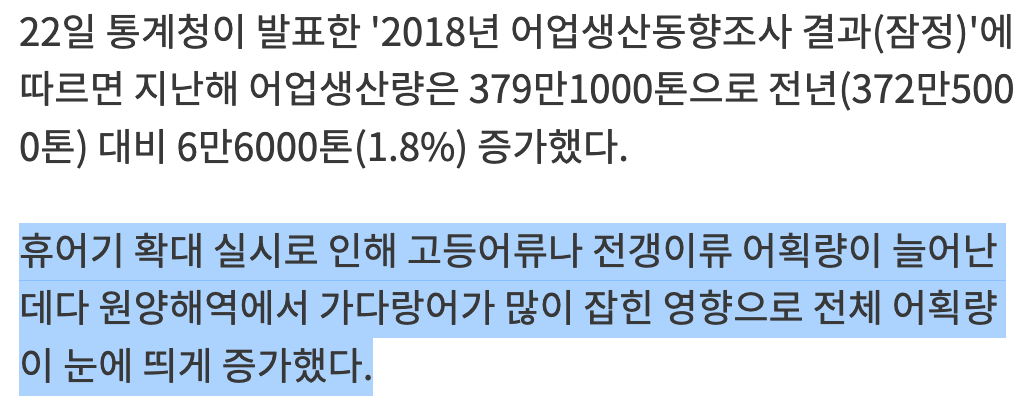

https://www.kookje.co.kr/news2011/special_m/2016biff/newsbody.asp?code=0200&key=20220111.33001002148&kid=k5397

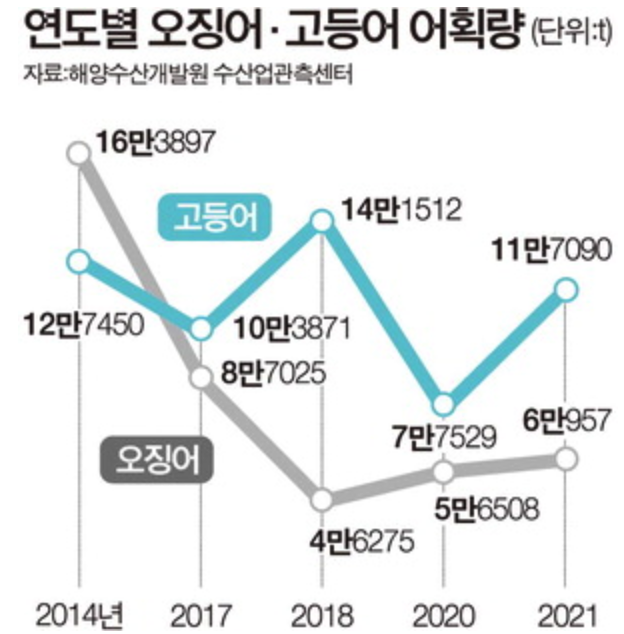

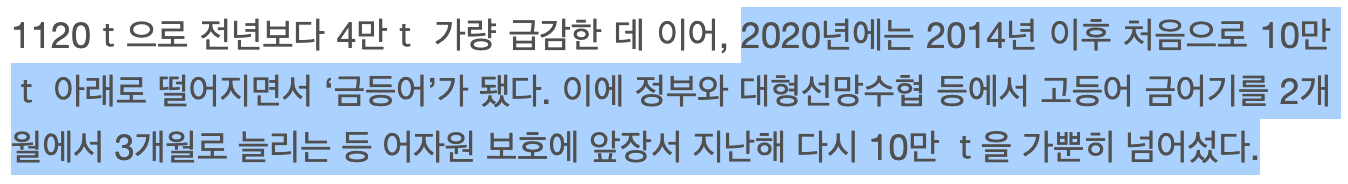

https://www.hankookilbo.com/News/Read/201902221073061908

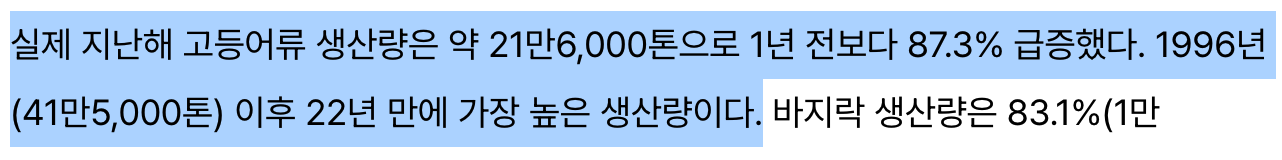

https://www.news1.kr/economy/trend/3554533

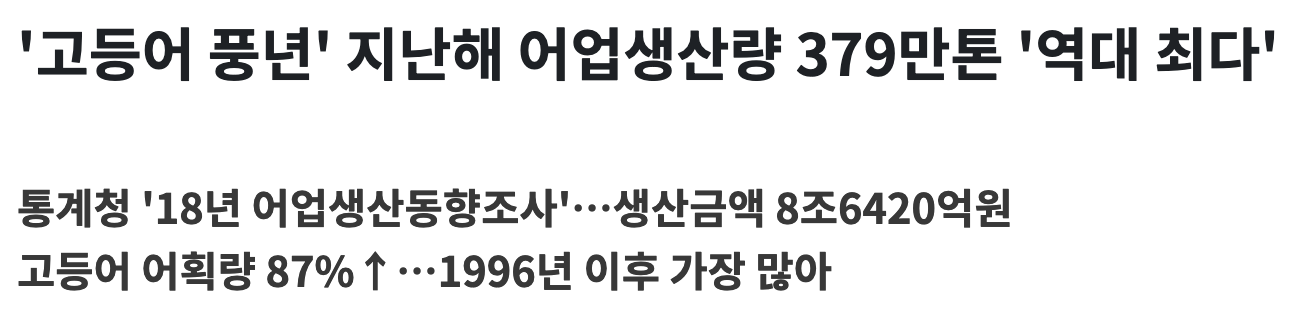

https://www.khan.co.kr/economy/economy-general/article/201910211325001

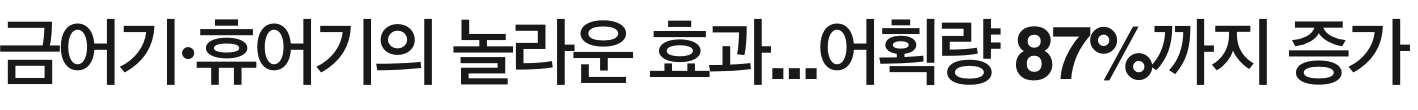

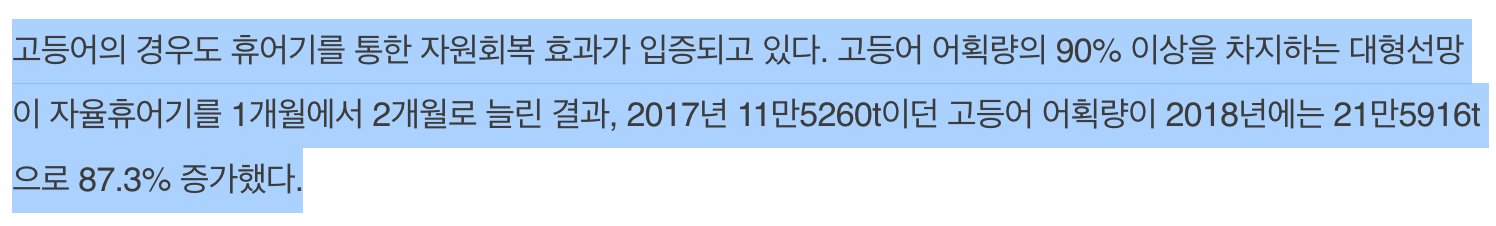

https://kid.chosun.com/site/data/html_dir/2021/05/06/2021050602315.html

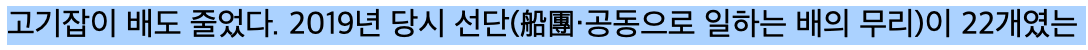

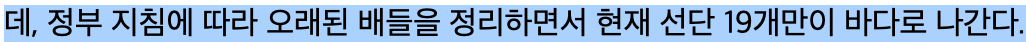